<a href="https://colab.research.google.com/github/ddiaz63/Data-110/blob/main/FinalProject_DarinaDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('/spotifysongs.csv')

# genre and calculate the mean popularity
genre_popularity = df.groupby('genre')['popularity'].mean().reset_index()

# bar chart
plt = px.bar(genre_popularity,
             x='genre',
             y='popularity',
             title='Average Song Popularity by Genre',
             color='popularity',
             color_continuous_scale='Viridis',
             labels={'popularity': 'Average Popularity', 'genre': 'Genre'})

# Customized graph
plt.update_layout(
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickangle=-45,
    yaxis_tickfont_size=14,
    xaxis_tickfont_size=14,
    showlegend=False,
    plot_bgcolor='white',
    margin=dict(l=40, r=40, t=60, b=120),
)

# data labels on top of the bars
plt.update_traces(texttemplate='%{y:.2f}', textposition='outside', marker=dict(line=dict(width=1, color='black')))


plt.show()

In [90]:
import pandas as pd
import plotly.express as px

# Group by artist and year
artist_year_popularity = df.groupby(['artist', 'year'])['popularity'].mean().reset_index()

# popularity within each artist
artist_year_popularity = artist_year_popularity.sort_values(by='popularity', ascending=False)

# top 10 artists and years with the highest popularity
top_10_artists_years = artist_year_popularity.groupby('artist').head(1).head(10)  # Get only the top song per artist

# bar chart to show artist popularity by year
plt = px.bar(top_10_artists_years,
             x='artist',
             y='popularity',
             color='year',
             title='Top 10 Artists by Average Song Popularity and Year',
             labels={'popularity': 'Average Popularity', 'artist': 'Artist', 'year': 'Release Year'},
             text='popularity',
             hover_data=['year'])

plt.update_layout(
    xaxis_tickangle=-45,
    title_font_size=24,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    yaxis_tickfont_size=14,
    xaxis_tickfont_size=14,
)

plt.show()


In [91]:
import pandas as pd
import plotly.graph_objects as go

# bins for energy, danceability, and popularity
df['energy_bin'] = pd.cut(df['energy'], bins=[0, 0.3, 0.6, 1], labels=['Low', 'Medium', 'High'])
df['danceability_bin'] = pd.cut(df['danceability'], bins=[0, 0.3, 0.6, 1], labels=['Low', 'Medium', 'High'])
df['popularity_bin'] = pd.cut(df['popularity'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])

grouped = df.groupby(['energy_bin', 'danceability_bin', 'popularity_bin']).size().reset_index(name='count')

energy_labels = ['Energy Low', 'Energy Medium', 'Energy High']
danceability_labels = ['Danceability Low', 'Danceability Medium', 'Danceability High']
popularity_labels = ['Popularity Low', 'Popularity Medium', 'Popularity High']

# node labels (energy + danceability + popularity)
node_labels = energy_labels + danceability_labels + popularity_labels

# mapping of labels to index
label_to_index = {label: idx for idx, label in enumerate(node_labels)}

# source and target nodes
sources = []
targets = []
values = []

# Iterate through the grouped data and generate source-target pairs
for _, row in grouped.iterrows():
    # Get indices for each combination of bins
    energy_idx = label_to_index[f"Energy {row['energy_bin']}"]
    danceability_idx = label_to_index[f"Danceability {row['danceability_bin']}"]
    popularity_idx = label_to_index[f"Popularity {row['popularity_bin']}"]

    # links between the nodes
    sources.append(energy_idx)
    targets.append(danceability_idx)
    values.append(row['count'])

    sources.append(danceability_idx)
    targets.append(popularity_idx)
    values.append(row['count'])

plt = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

plt.update_layout(title_text="Sankey Diagram: Song Features (Energy, Danceability) and Popularity", font_size=10)

plt.show()


<ipython-input-91-f6c207287488>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



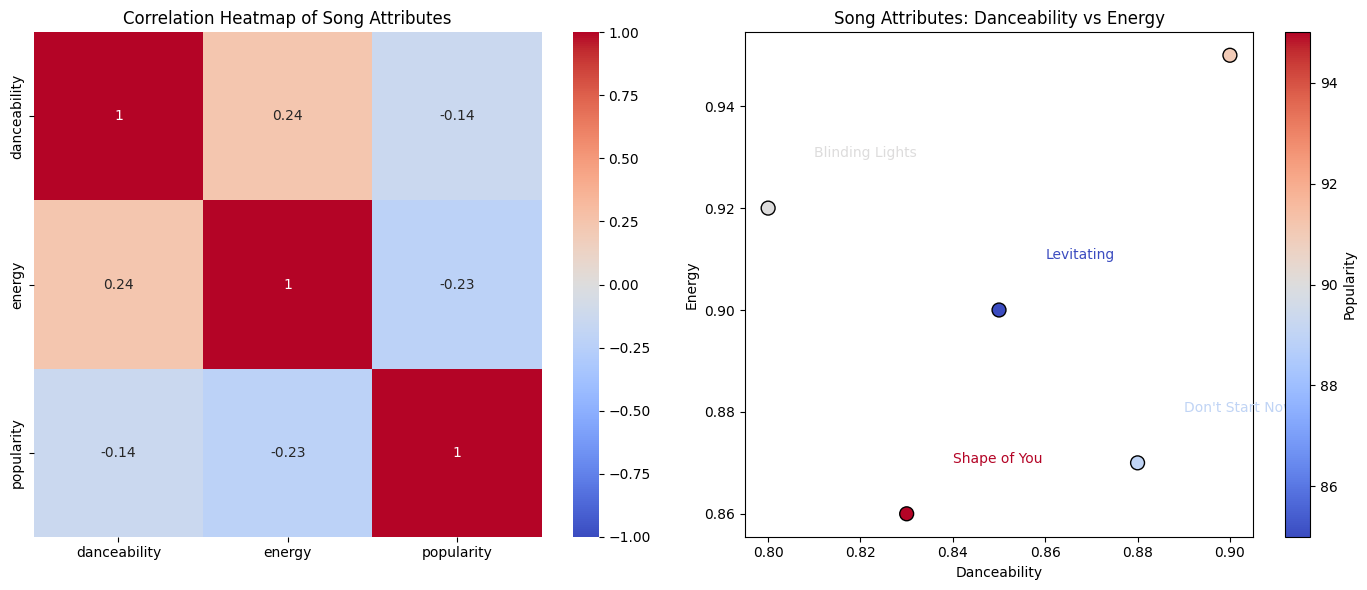

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dataframe (replace with actual df)
data = {
    'song': ['Levitating', 'Blinding Lights', 'Uptown Funk', "Don't Start Now", 'Shape of You'],
    'danceability': [0.85, 0.8, 0.9, 0.88, 0.83],
    'energy': [0.9, 0.92, 0.95, 0.87, 0.86],
    'popularity': [85, 90, 91, 89, 95]
}
df_songs = pd.DataFrame(data)

# correlation matrix for the heatmap
corr = df_songs[['danceability', 'energy', 'popularity']].corr()

# figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation Heatmap of Song Attributes')

# Right plot: Mini-graph for the song attributes (scatter plot or bar plot)
scatter = axes[1].scatter(df_songs['danceability'], df_songs['energy'],
                          c=df_songs['popularity'], cmap='coolwarm', s=100, edgecolors='black')

# Annotating the songs in the mini-graph with their name and color matching the heatmap
for i, row in df_songs.iterrows():
    axes[1].annotate(row['song'], (row['danceability'] + 0.01, row['energy'] + 0.01),
                     fontsize=10, ha='left', color=plt.cm.coolwarm((row['popularity'] - df_songs['popularity'].min()) / (df_songs['popularity'].max() - df_songs['popularity'].min())))

cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Popularity')

# labels for the mini-graph
axes[1].set_xlabel('Danceability')
axes[1].set_ylabel('Energy')
axes[1].set_title('Song Attributes: Danceability vs Energy')


plt.tight_layout()
plt.show()


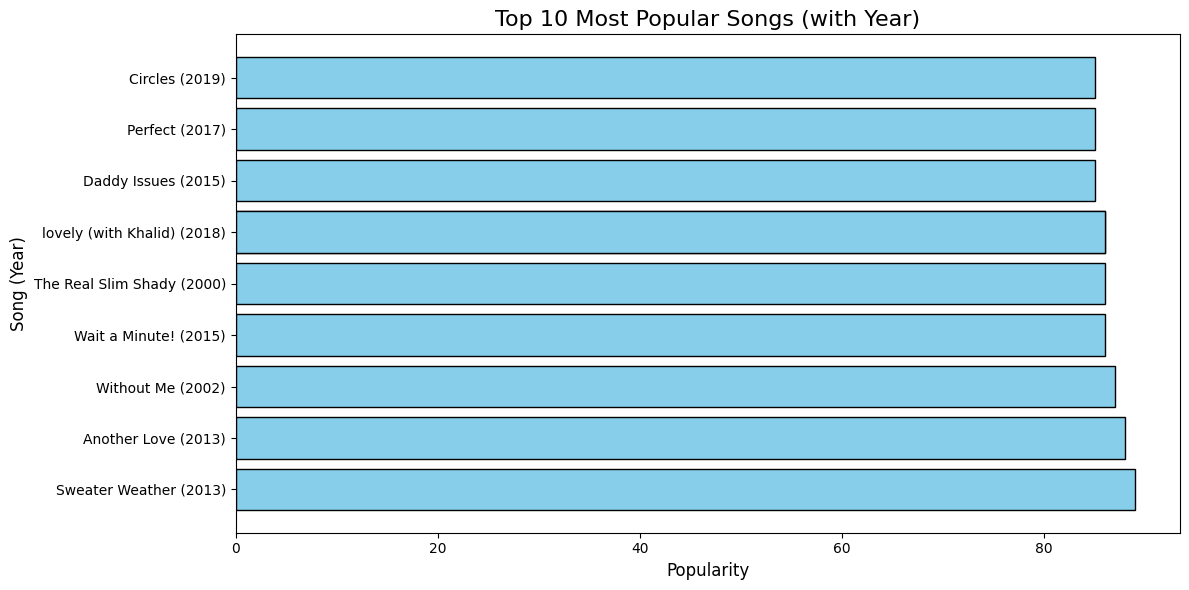

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

top_10_songs = df[['song', 'popularity', 'year']].sort_values(by='popularity', ascending=False).head(10)

top_10_songs['song_year'] = top_10_songs['song'] + ' (' + top_10_songs['year'].astype(str) + ')'

plt.figure(figsize=(12, 6))

# Bar plot for top 10 songs with the year included in the labels
plt.barh(top_10_songs['song_year'], top_10_songs['popularity'], color='skyblue', edgecolor='black')

plt.title("Top 10 Most Popular Songs (with Year)", fontsize=16)
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Song (Year)", fontsize=12)


plt.tight_layout()

plt.show()
